<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.786450,37.858902,89.089755,-0.020816,225.714292,225.735180,-0.020888
1,0.0,1.0,66.651309,45.393868,98.836638,-0.001985,220.879829,220.871419,0.008411
2,0.0,2.0,77.556357,72.661525,65.687590,-0.001324,225.904147,225.900145,0.004002
3,0.0,3.0,75.890695,53.007668,96.040482,-0.027055,234.911791,234.929124,-0.017334
4,0.0,4.0,80.034190,48.716385,71.281210,0.024436,210.056221,210.032460,0.023761
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,59.015685,22.537461,87.301417,-0.039362,178.815200,178.861507,-0.046307
19996,999.0,16.0,87.897622,92.291723,38.744475,-0.007573,228.926246,228.920393,0.005853
19997,999.0,17.0,58.562363,55.909210,41.893561,0.006065,166.371200,166.367896,0.003304
19998,999.0,18.0,71.659366,44.078990,52.591063,-0.014568,178.314850,178.327699,-0.012849


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.786450,37.858902,89.089755,-0.020816,225.714292,225.735180,-0.020888
1,0.0,1.0,66.651309,45.393868,98.836638,-0.001985,220.879829,220.871419,0.008411
2,0.0,2.0,77.556357,72.661525,65.687590,-0.001324,225.904147,225.900145,0.004002
3,0.0,3.0,75.890695,53.007668,96.040482,-0.027055,234.911791,234.929124,-0.017334
4,0.0,4.0,80.034190,48.716385,71.281210,0.024436,210.056221,210.032460,0.023761
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,59.015685,22.537461,87.301417,-0.039362,178.815200,178.861507,-0.046307
19996,999.0,16.0,87.897622,92.291723,38.744475,-0.007573,228.926246,228.920393,0.005853
19997,999.0,17.0,58.562363,55.909210,41.893561,0.006065,166.371200,166.367896,0.003304
19998,999.0,18.0,71.659366,44.078990,52.591063,-0.014568,178.314850,178.327699,-0.012849


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    88.786450  37.858902  89.089755  ...  225.714292  225.735180 -0.020888
      1.0    66.651309  45.393868  98.836638  ...  220.879829  220.871419  0.008411
      2.0    77.556357  72.661525  65.687590  ...  225.904147  225.900145  0.004002
      3.0    75.890695  53.007668  96.040482  ...  234.911791  234.929124 -0.017334
      4.0    80.034190  48.716385  71.281210  ...  210.056221  210.032460  0.023761
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   59.015685  22.537461  87.301417  ...  178.815200  178.861507 -0.046307
      16.0   87.897622  92.291723  38.744475  ...  228.926246  228.920393  0.005853
      17.0   58.562363  55.909210  41.893561  ...  166.371200  166.367896  0.003304
      18.0   71.659366  44.078990  52.591063  ...  178.314850  178.327699 -0.012849
      19.0   99.123412  72.685475  81.314272  ...  263.122909  263.107877  0.015032

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    88.786450  37.858902  89.089755  ...  225.714292  225.735180 -0.020888
      1.0    66.651309  45.393868  98.836638  ...  220.879829  220.871419  0.008411
      2.0    77.556357  72.661525  65.687590  ...  225.904147  225.900145  0.004002
      3.0    75.890695  53.007668  96.040482  ...  234.911791  234.929124 -0.017334
      4.0    80.034190  48.716385  71.281210  ...  210.056221  210.032460  0.023761
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   59.015685  22.537461  87.301417  ...  178.815200  178.861507 -0.046307
      16.0   87.897622  92.291723  38.744475  ...  228.926246  228.920393  0.005853
      17.0   58.562363  55.909210  41.893561  ...  166.371200  166.367896  0.003304
      18.0   71.659366  44.078990  52.591063  ...  178.314850  178.327699 -0.012849
      19.0   99.123412  72.685475  81.314272  ...  263.122909  263.107877  0.015032

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.786450,37.858902,89.089755,-0.020816,225.714292,225.735180,-0.020888
1,0.0,1.0,66.651309,45.393868,98.836638,-0.001985,220.879829,220.871419,0.008411
2,0.0,2.0,77.556357,72.661525,65.687590,-0.001324,225.904147,225.900145,0.004002
3,0.0,3.0,75.890695,53.007668,96.040482,-0.027055,234.911791,234.929124,-0.017334
4,0.0,4.0,80.034190,48.716385,71.281210,0.024436,210.056221,210.032460,0.023761
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,59.015685,22.537461,87.301417,-0.039362,178.815200,178.861507,-0.046307
19996,999.0,16.0,87.897622,92.291723,38.744475,-0.007573,228.926246,228.920393,0.005853
19997,999.0,17.0,58.562363,55.909210,41.893561,0.006065,166.371200,166.367896,0.003304
19998,999.0,18.0,71.659366,44.078990,52.591063,-0.014568,178.314850,178.327699,-0.012849


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    88.786450  37.858902  89.089755  ...  225.714292  225.735180 -0.020888
      1.0    66.651309  45.393868  98.836638  ...  220.879829  220.871419  0.008411
      2.0    77.556357  72.661525  65.687590  ...  225.904147  225.900145  0.004002
      3.0    75.890695  53.007668  96.040482  ...  234.911791  234.929124 -0.017334
      4.0    80.034190  48.716385  71.281210  ...  210.056221  210.032460  0.023761
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   59.015685  22.537461  87.301417  ...  178.815200  178.861507 -0.046307
      16.0   87.897622  92.291723  38.744475  ...  228.926246  228.920393  0.005853
      17.0   58.562363  55.909210  41.893561  ...  166.371200  166.367896  0.003304
      18.0   71.659366  44.078990  52.591063  ...  178.314850  178.327699 -0.012849
      19.0   99.123412  72.685475  81.314272  ...  263.122909  263.107877  0.015032

[20000 rows x 7 columns]

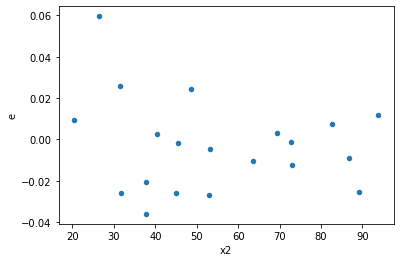

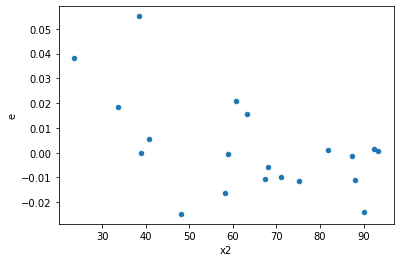

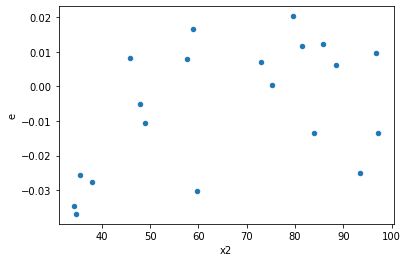

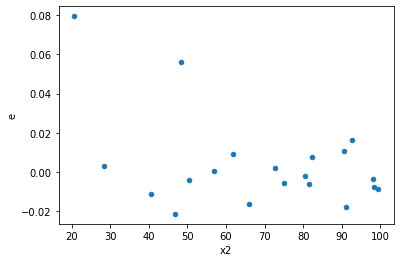

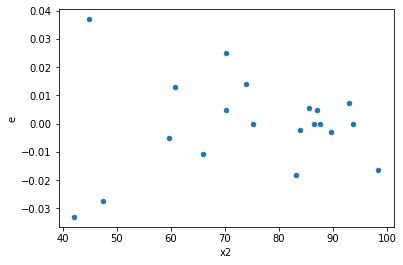

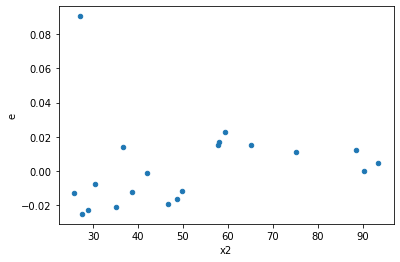

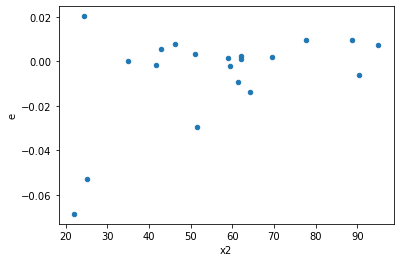

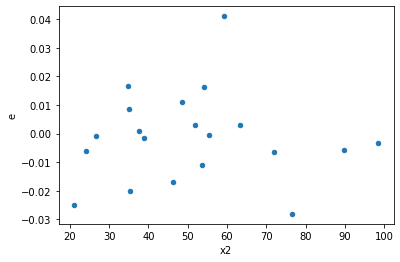

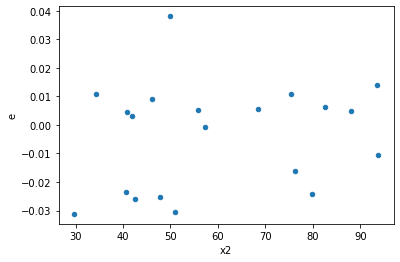

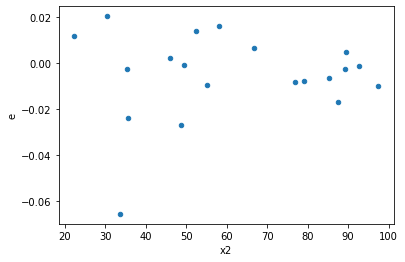

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
7.0,5.0,5.0,0.0008964279057352086,0.0009750431623299227,0.00017928558114704173,0.00019500863246598455,1.087698359334583,0.928749268516394,0.535625365741803,0.464374634258197,Reject001=1 : Homoscedasticity
34.0,5.0,5.0,0.0009123172641556946,0.0011547911389371086,0.0001824634528311389,0.00023095822778742173,1.2657780185775744,0.8022308225775174,0.5988845887112413,0.4011154112887587,Reject001=1 : Homoscedasticity
57.0,5.0,5.0,0.00021147427667361456,0.0005704718219516492,4.2294855334722915e-05,0.00011409436439032985,2.697594387955301,0.30006932026432787,0.8499653398678361,0.15003466013216393,Reject001=1 : Homoscedasticity
58.0,5.0,5.0,0.0005914221366319017,0.0010049008788529834,0.00011828442732638034,0.0002009801757705967,1.699126252824772,0.5748760505810249,0.7125619747094876,0.28743802529051243,Reject001=1 : Homoscedasticity
65.0,5.0,5.0,0.0004840616388241773,0.0008530543561516884,9.681232776483546e-05,0.00017061087123033768,1.762284568188098,0.5491460839113729,0.7254269580443136,0.27457304195568644,Reject001=1 : Homoscedasticity
76.0,5.0,5.0,0.00043042482866511607,0.0011118816251099765,8.608496573302321e-05,0.0002223763250219953,2.583219068840137,0.3209262219042661,0.8395368890478669,0.16046311095213306,Reject001=1 : Homoscedasticity
80.0,5.0,5.0,0.0003974624355566196,0.0008485680955373635,7.949248711132392e-05,0.0001697136191074727,2.134964262343435,0.42486490494475304,0.7875675475276235,0.21243245247237652,Reject001=1 : Homoscedasticity
81.0,5.0,5.0,0.0006318725706401623,0.0007045391063920325,0.00012637451412803247,0.00014090782127840649,1.1150018834940885,0.9078276099628644,0.5460861950185678,0.4539138049814322,Reject001=1 : Homoscedasticity
86.0,5.0,5.0,0.0005779656659501859,0.0019519233691660306,0.00011559313319003718,0.0003903846738332061,3.377230662927068,0.20774148397057668,0.8961292580147117,0.10387074198528834,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.00433412914595701,0.0010083976128808262,0.0008668258291914021,0.00020167952257616525,0.23266441283169562,0.1354410080772855,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,0.0008198526004028038,0.00044863805602179436,0.00016397052008056075,8.972761120435887e-05,0.5472179460080665,0.5241913309819974,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,0.000404509760166393,0.00016392680702691958,8.09019520332786e-05,3.278536140538392e-05,0.4052480883514136,0.34407656984686885,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,0.0012754244252471006,6.545136805995645e-05,0.00025508488504942013,1.309027361199129e-05,0.051317323680135654,0.005423186803310362,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,0.0033167383583122966,0.00011045086146732173,0.0006633476716624593,2.2090172293464347e-05,0.03330104745540557,0.0019563340449327113,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,0.007275185359965457,6.76149791350287e-05,0.0014550370719930913,1.3522995827005741e-05,0.009293918407509792,8.753536074219815e-05,Reject001=0 : Heteroscedasticity
6.0,5.0,5.0,0.0025302898232054927,0.00018901980176213505,0.0005060579646410985,3.780396035242701e-05,0.0747028265412994,0.012823752806083107,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,0.0008964279057352086,0.0009750431623299227,0.00017928558114704173,0.00019500863246598455,1.087698359334583,0.928749268516394,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,0.0006063328301596342,0.0004489308834581492,0.00012126656603192684,8.978617669162984e-05,0.7404033908900423,0.7495874719060617,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      788
Reject001=0 : Heteroscedasticity    212
Name: Result_test, dtype: int64